In [149]:
import pandas as pd
df = pd.read_csv('data.csv')

In [150]:
print(df.describe())

         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000


In [165]:
# check for null values
print(df.isnull())

# replace null values with mean
df.fillna(df.mean(), inplace=True)

     Duration  Pulse  Calories
0       False  False     False
1       False  False     False
2       False  False     False
3       False  False     False
4       False  False     False
..        ...    ...       ...
164     False  False     False
165     False  False     False
166     False  False     False
167     False  False     False
168     False  False     False

[169 rows x 3 columns]


In [166]:
# aggregate df using min, max, count, and mean for 'Duration' and 'Calories'
agg_df = df[['Duration', 'Calories']].agg(['min', 'max', 'count', 'mean'])
print(agg_df)

         Duration     Calories
min     15.000000    50.000000
max    300.000000  1860.000000
count  169.000000   169.000000
mean    63.846154   375.544379


In [167]:
# filter rows where 'Calories' values are between 500 and 1000
filtered_df = df[(df['Calories'] >= 500) & (df['Calories'] <= 1000)]
print(filtered_df)

     Duration  Pulse  Calories
51         80    123       643
62        160    109       853
65        180     90       800
66        150    105       873
67        150    107       816
72         90    100       700
73        150     97       953
75         90     98       563
78        120    100       500
83        120    100       500
87        120    100      1000
90        180    101       600
99         90     93       604
101        90     90       500
102        90     90       500
103        90     90       500
106       180     90       800
108        90     90       500


In [168]:
# filter rows where 'Calories' values are greater than 500 and 'Pulse' values are less than 100
filtered_df_2 = df[(df['Calories'] > 500) & (df['Pulse'] < 100)]
print(filtered_df_2)

     Duration  Pulse  Calories
65        180     90       800
70        150     97      1115
73        150     97       953
75         90     98       563
99         90     93       604
106       180     90       800


In [155]:
# create a new dfframe 'df_modified' that contains all columns from df except for 'Maxpulse'
df_modified = df.drop(columns=['Maxpulse'])
print(df_modified.head())


   Duration  Pulse  Calories
0        60    110     409.1
1        60    117     479.0
2        60    103     340.0
3        45    109     282.4
4        45    117     406.0


In [156]:
# delete 'Maxpulse' column from the main df dataframe
del df['Maxpulse']

In [157]:
# convert 'Calories' column datatype to int
df['Calories'] = df['Calories'].astype(int)

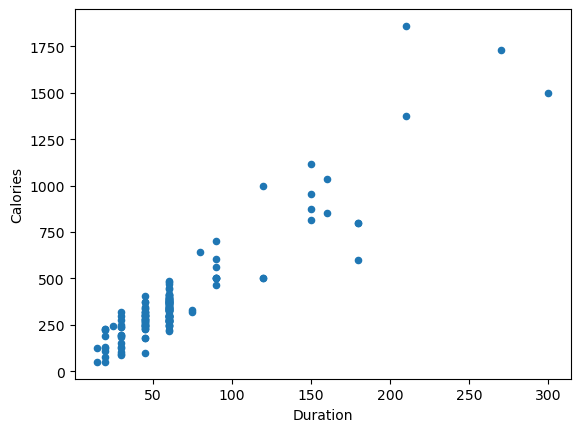

In [158]:
import matplotlib.pyplot as plt
# create a scatter plot for 'Duration' and 'Calories'
df.plot(kind='scatter', x='Duration', y='Calories')
plt.show()

(Titanic Dataset)
1. Find the correlation between ‘survived’ (target column) and ‘sex’ column for the Titanic use case inclass.
    a. Do you think we should keep this feature?
2. Do at least two visualizations to describe or show correlations.
3. Implement Naïve Bayes method using scikit-learn library and report the accuracy

In [159]:
import pandas as pd

# Load the titanic dataset
titanic_df = pd.read_csv('titanic.csv')

# Replace 'male' with 0 and 'female' with 1
titanic_df['Sex'] = titanic_df['Sex'].replace({'male': 0, 'female': 1})

# Find the correlation between 'Survived' and 'Sex'
correlation = titanic_df['Survived'].corr(titanic_df['Sex'])
print('Correlation between Survived and Sex:', correlation)


Correlation between Survived and Sex: 0.5433513806577546


The correlation coefficient between 'Survived' and 'Sex' is 0.54, indicating a moderate positive correlation. Therefore, we should keep this feature.

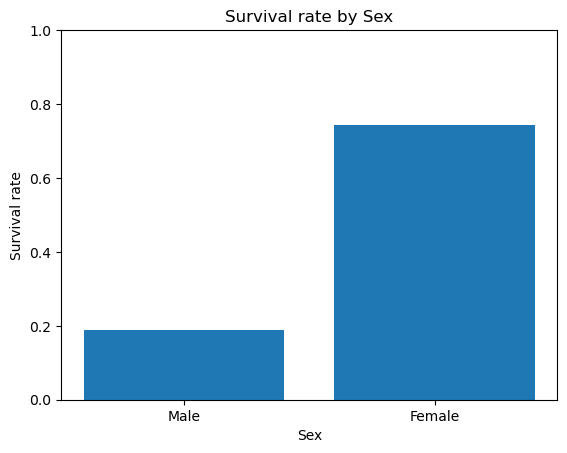

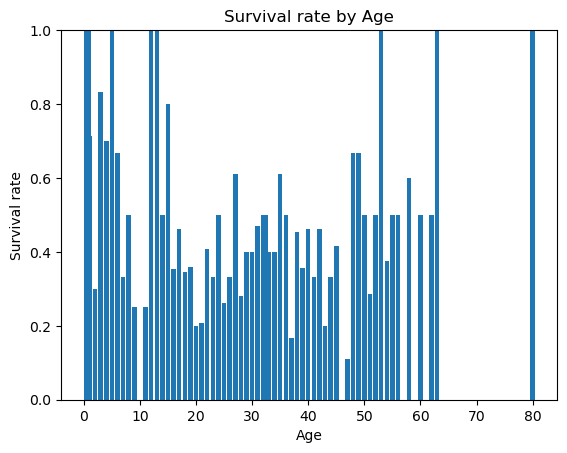

In [160]:
# Visualization 1: Bar plot of Survival rate by Sex
survival_by_sex = titanic_df.groupby('Sex')['Survived'].mean()
plt.bar(survival_by_sex.index, survival_by_sex.values)
plt.xlabel('Sex')
plt.ylabel('Survival rate')
plt.title('Survival rate by Sex')
plt.xticks([0, 1], ['Male', 'Female'])
plt.ylim(0, 1)
plt.show()

# Visualization 1: Bar plot of Survival rate by Age
survival_by_sex = titanic_df.groupby('Age')['Survived'].mean()
plt.bar(survival_by_sex.index, survival_by_sex.values)
plt.xlabel('Age')
plt.ylabel('Survival rate')
plt.title('Survival rate by Age')
plt.xticks()
plt.ylim(0, 1)
plt.show()

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# replace null values with mean
titanic_df.fillna(0, inplace=True)

# Select the features and target variable
X = titanic_df[['Pclass', 'Sex', 'Age', 'Fare']]
y = titanic_df['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the Naïve Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7821229050279329


Implement Naïve Bayes method using scikit-learn library.
a. Use the glass dataset available in Link also provided in your assignment.
b. Use train_test_split to create training and testing part.
Evaluate the model on testing part using score and

In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Load the glass dataset
glass_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data', header=None)

# Set the column names
glass_df.columns = ['id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

# Select the features and target variable
X = glass_df.drop(['id', 'Type'], axis=1)
y = glass_df['Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Naive Bayes classifier object
nb = GaussianNB()

# Train the classifier using the training data
nb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = nb.predict(X_test)

# Evaluate the accuracy of the model
acc_nb = round(nb.score(X_train, y_train) * 100, 2)

print("nb accuracy =", acc_nb)
print(classification_report(y_test, y_pred))


nb accuracy = 59.06
              precision    recall  f1-score   support

           1       0.19      0.44      0.27         9
           2       0.33      0.16      0.21        19
           3       0.33      0.20      0.25         5
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.37        43
   macro avg       0.42      0.47      0.42        43
weighted avg       0.40      0.37      0.36        43



Implement linear SVM method using scikit library
a. Use the glass dataset available in Link also provided in your assignment.
b. Use train_test_split to create training and testing part.
 Evaluate the model on testing part using score and

In [163]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

# Load the glass dataset
glass_df = pd.read_csv('glass.csv')

# Select the features and target variable
X = glass_df.drop('Type', axis=1)
y = glass_df['Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create the linear SVM classifier
clf = LinearSVC(random_state=0,max_iter=500000)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
acc_svc = round(clf.score(X_train, y_train) * 100, 2)

print("svm accuracy =", acc_svc)
print(classification_report(y_test, y_pred))


svm accuracy = 69.01
              precision    recall  f1-score   support

           1       0.35      0.78      0.48         9
           2       0.53      0.42      0.47        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       1.00      0.50      0.67         2
           7       0.86      1.00      0.92         6

    accuracy                           0.51        43
   macro avg       0.46      0.45      0.42        43
weighted avg       0.48      0.51      0.47        43



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


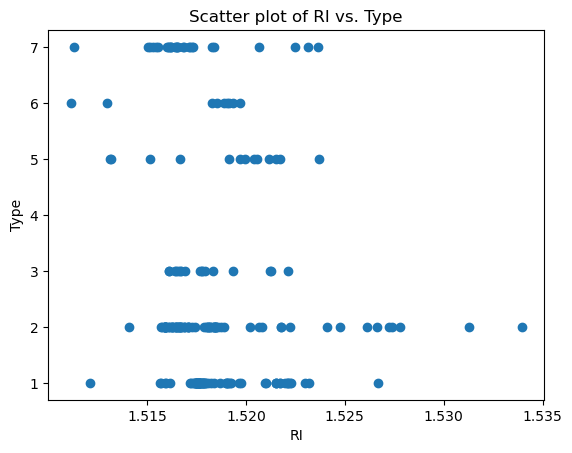

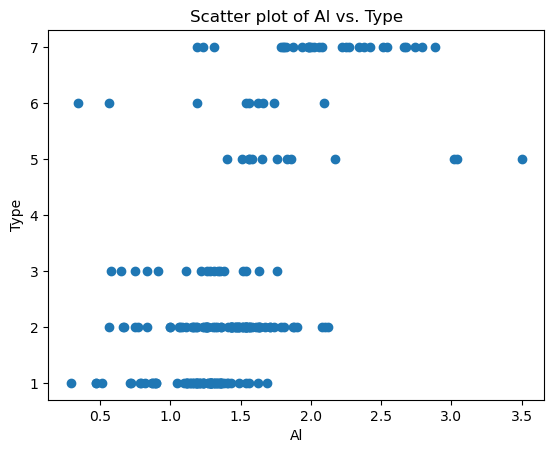

In [164]:
# Visualization 1: Scatter plot of RI vs. Type
plt.scatter(glass_df['RI'], glass_df['Type'])
plt.xlabel('RI')
plt.ylabel('Type')
plt.title('Scatter plot of RI vs. Type')
plt.show()

# Visualization 2: Scatter plot of AL vs. Type
plt.scatter(glass_df['Al'], glass_df['Type'])
plt.xlabel('Al')
plt.ylabel('Type')
plt.title('Scatter plot of Al vs. Type')
plt.show()